In [1]:
pip install spacy

In [4]:
!pip install es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.4
    Uninstalling typer-0.9.4:
      Successfully uninstalled typer-0.9.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.1
    Uninstalling pydantic-2.7.1:
      Successfully uninstalled pydantic-2.7.1
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.3
    Uninstalling thinc-8.2.3:
      Successfully uninstalle

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
<ipython-input-1-0852bda4b599>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender_Age_Category', data=all_data[all_data['Survived'] == 1], palette='pastel')


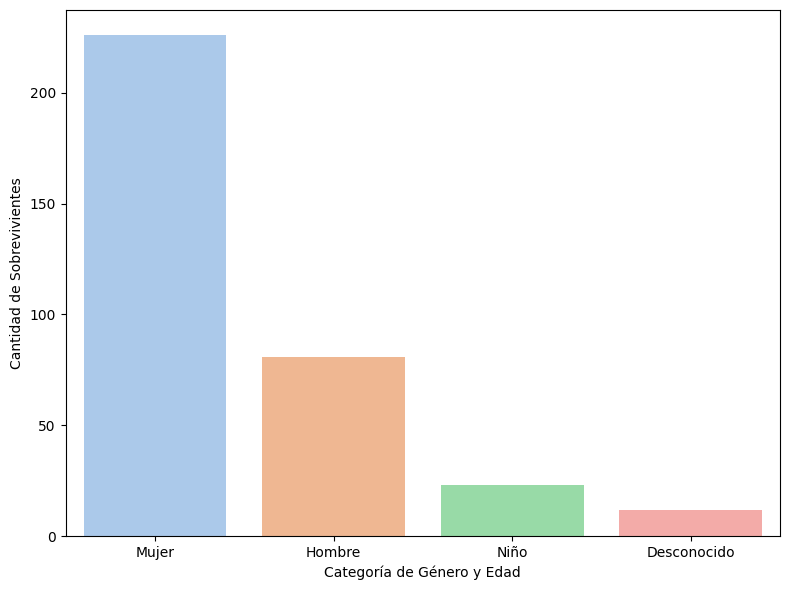

Cantidad de Sobrevivientes por Género y Edad:
Gender_Age_Category
Mujer          226
Hombre          81
Niño            23
Desconocido     12
Name: count, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

# Cargar los datos del Titanic
train_data = pd.read_csv("/content/drive/MyDrive/Universidad/Cursos/Python Data Science/Datasets/M3/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Universidad/Cursos/Python Data Science/Datasets/M3/test.csv")

# Combinar los datos de entrenamiento y prueba
all_data = pd.concat([train_data, test_data], ignore_index=True)

# Función para determinar el género y la edad aproximada
def categorize_gender_age(name):
    name = name.lower()
    if 'mr.' in name:
        return 'Hombre'
    elif 'mrs.' in name or 'miss.' in name:
        return 'Mujer'
    elif 'master.' in name or 'boy' in name or 'baby' in name:
        return 'Niño'
    return 'Desconocido'

# Aplicar la función a cada fila
all_data['Gender_Age_Category'] = all_data['Name'].apply(categorize_gender_age)

# Contar la cantidad de sobrevivientes por categoría de género y edad
survivors_count = all_data[all_data['Survived'] == 1]['Gender_Age_Category'].value_counts()

# Visualización de la cantidad de sobrevivientes por género y edad
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender_Age_Category', data=all_data[all_data['Survived'] == 1], palette='pastel')
#plt.title('Cantidad de Sobrevivientes por Género y Edad')
plt.xlabel('Categoría de Género y Edad')
plt.ylabel('Cantidad de Sobrevivientes')
plt.tight_layout()
plt.show()

# Imprimir los resultados
print("Cantidad de Sobrevivientes por Género y Edad:")
print(survivors_count)


In [3]:
!python -m spacy download en_core_web_sm

2024-05-17 02:01:01.860637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 02:01:01.860715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 02:01:01.862478: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-17 02:01:03.141506: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl#egg=en_core_web_sm==3.1.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behavio

<ipython-input-4-89f6339512fe>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='pastel')


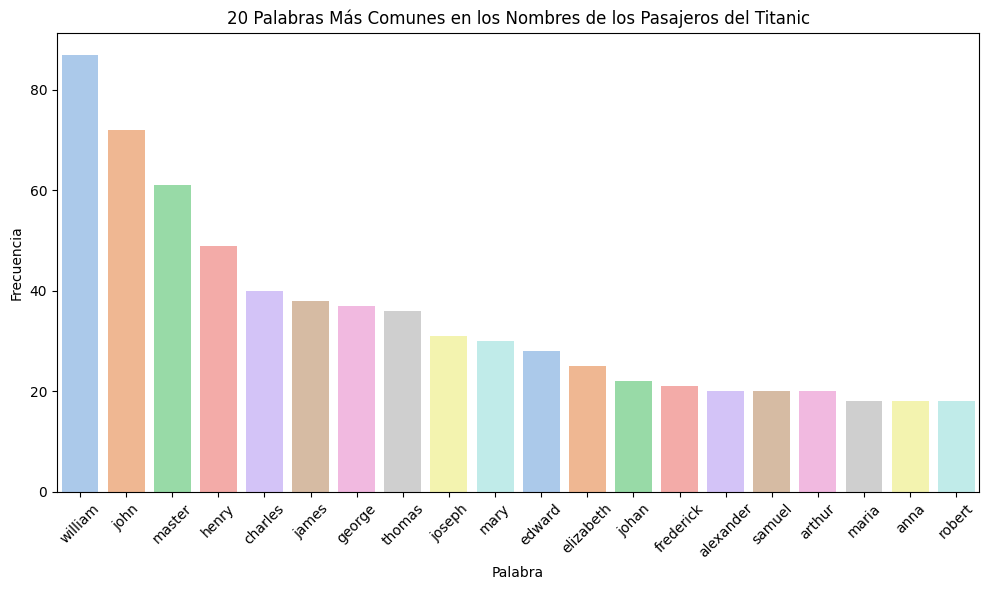

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy

# Cargar los datos del Titanic
train_data = pd.read_csv("/content/drive/MyDrive/Universidad/Cursos/Python Data Science/Datasets/M3/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Universidad/Cursos/Python Data Science/Datasets/M3/test.csv")

# Combinar los datos de entrenamiento y prueba
all_data = pd.concat([train_data, test_data], ignore_index=True)

# Cargar el modelo de lenguaje de spaCy para procesar nombres en inglés
nlp = spacy.load("en_core_web_sm")

# Función para procesar y limpiar los nombres utilizando spaCy
def process_names(name):
    doc = nlp(name)
    tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
    return tokens

# Aplicar la función a cada nombre y combinar los tokens en una lista
all_data['Name_Tokens'] = all_data['Name'].apply(process_names)
all_tokens = [token for name_tokens in all_data['Name_Tokens'] for token in name_tokens]

# Contar la frecuencia de cada palabra
word_freq = Counter(all_tokens)

# Seleccionar las palabras más comunes
common_words = word_freq.most_common(20)

# Visualización de las palabras más comunes
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='pastel')
plt.title('20 Palabras Más Comunes en los Nombres de los Pasajeros del Titanic')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
# Importar bibliotecas necesarias
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')

# Definir función para tokenizar texto por palabras
def tokenize_words(text):
    return word_tokenize(text)

# Definir función para tokenizar texto por frases
def tokenize_sentences(text):
    return sent_tokenize(text)

# Texto de ejemplo
texto_ejemplo = "Este es un ejemplo de texto. Incluye varias frases y palabras diferentes."

# Tokenizar texto por palabras
tokens_palabras = tokenize_words(texto_ejemplo)
print("Tokens por palabras:", tokens_palabras)

# Tokenizar texto por frases
tokens_frases = tokenize_sentences(texto_ejemplo)
print("Tokens por frases:", tokens_frases)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tokens por palabras: ['Este', 'es', 'un', 'ejemplo', 'de', 'texto', '.', 'Incluye', 'varias', 'frases', 'y', 'palabras', 'diferentes', '.']
Tokens por frases: ['Este es un ejemplo de texto.', 'Incluye varias frases y palabras diferentes.']
